# Carga de datos

In [18]:
# Importacion de las librerias usadas.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Lectura de datos
datos = pd.read_csv('./online_retail_II.csv')

## 1 - Determinar el país que más productos consume
Usaremos las siguientes columnas
- Country: Pais
- Quantity: Cantidad

In [20]:
consumo = datos.groupby("Country")["Quantity"].sum().idxmax()

In [21]:
print("Pais que mas productos consume es: ", consumo)

Pais que mas productos consume es:  United Kingdom


In [22]:
print("Aqui podemos ver los paises y su consumo")
print(datos.groupby("Country")["Quantity"].sum().reset_index())

Aqui podemos ver los paises y su consumo
                 Country  Quantity
0              Australia     20053
1                Austria      6479
2                Bahrain      1015
3                Belgium     11980
4                Bermuda      2798
5                 Brazil       189
6                 Canada       894
7        Channel Islands     10994
8                 Cyprus      4371
9                Denmark    227030
10                  EIRE    188704
11               Finland      3651
12                France     74471
13               Germany    107133
14                Greece      6151
15             Hong Kong      2306
16               Iceland       828
17                Israel      1132
18                 Italy      7310
19                 Japan      6604
20                 Korea       598
21               Lebanon        71
22             Lithuania      2306
23                 Malta      1547
24           Netherlands    181823
25               Nigeria        56
26            

## 2 - Identificar los productos más vendidos o los más populares en términos de ganancias o cantidad de ventas.

Primero vamos a crear una nueva columna en el dataset.
- Profits: Quantity * Price

Luego sacamos los productos en terminos de ganancias y ventas

In [23]:
datos["Profits"] = datos["Quantity"] * datos["Price"]

In [24]:
productos_vendidos_profits = datos.groupby("Description")["Profits"].sum().reset_index()

productos_vendidos_profits = productos_vendidos_profits.sort_values(by="Profits", ascending=False)

In [25]:
productos_vendidos_quantity = datos.groupby("Description")["Quantity"].sum().reset_index()

productos_vendidos_quantity = productos_vendidos_quantity.sort_values(by="Quantity",ascending=False)

In [26]:
print("Mas vendidos por ganancias:")
print(productos_vendidos_profits.head())

print("\nMas vendidos por cantidad:")
print(productos_vendidos_quantity.head())

Productos más vendidos en términos de ganancias:
                             Description    Profits
3371            REGENCY CAKESTAND 3 TIER  163051.46
4402  WHITE HANGING HEART T-LIGHT HOLDER  157865.43
1297                      DOTCOM POSTAGE  116401.99
279        ASSORTED COLOUR BIRD ORNAMENT   72454.12
2780     PAPER CHAIN KIT 50'S CHRISTMAS    57870.20

Productos más vendidos en términos de cantidad:
                             Description  Quantity
4402  WHITE HANGING HEART T-LIGHT HOLDER     57733
4509   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54698
721                  BROCADE RING PURSE      47647
2744    PACK OF 72 RETRO SPOT CAKE CASES     46106
279        ASSORTED COLOUR BIRD ORNAMENT     44925


## Detectar patrones y tendencias, por ejemplo, identificar si hay picos de ventas durante ciertos meses del año.

Aqui lo que podemos hacer es usar pandas para convertir la columna InvoiceDate en un datetime y poder trabajar con ella.

In [27]:
datos["InvoiceDate"] = pd.to_datetime(datos["InvoiceDate"])

# Creamos la columna Month para almacenar el mes correspondiente
datos["Month"] = datos["InvoiceDate"].dt.month

Ahora simplemente sumamos las ventas para cada mes.

In [28]:
ventas_mes = datos.groupby("Month")["Quantity"].sum().reset_index()

Aqui usamos matplotlib para poder visualizar los datos de mejor manera.

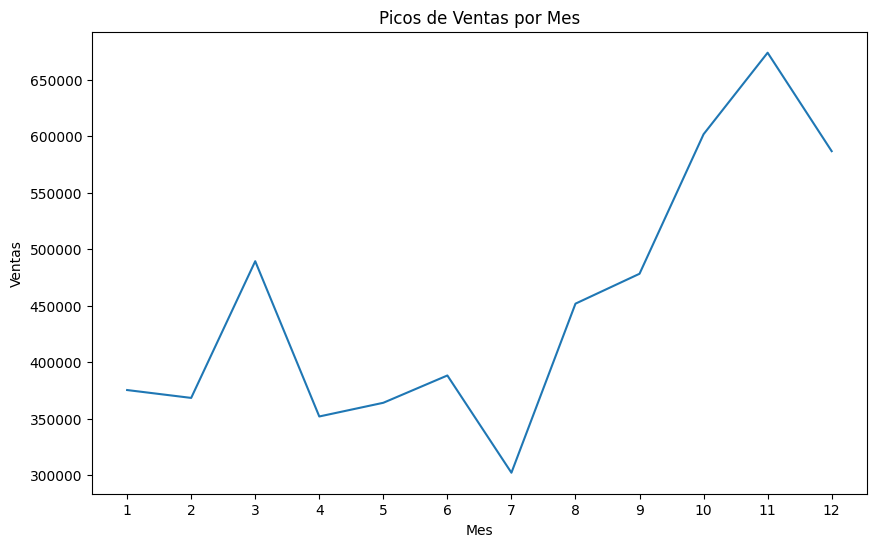

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(ventas_mes["Month"], ventas_mes["Quantity"])
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.title("Picos de Ventas por Mes")
plt.xticks(range(1, 13))
plt.show()


Podemos hacer otro tipo de analisis para ver los picos de ventas por dia

Como ya hemos transformado InvoiceDate, podemos trabajar mas facilmente con el

In [30]:
datos["Hour"] = datos["InvoiceDate"].dt.hour
ventas_por_hora = datos.groupby("Hour")["Quantity"].sum().reset_index()

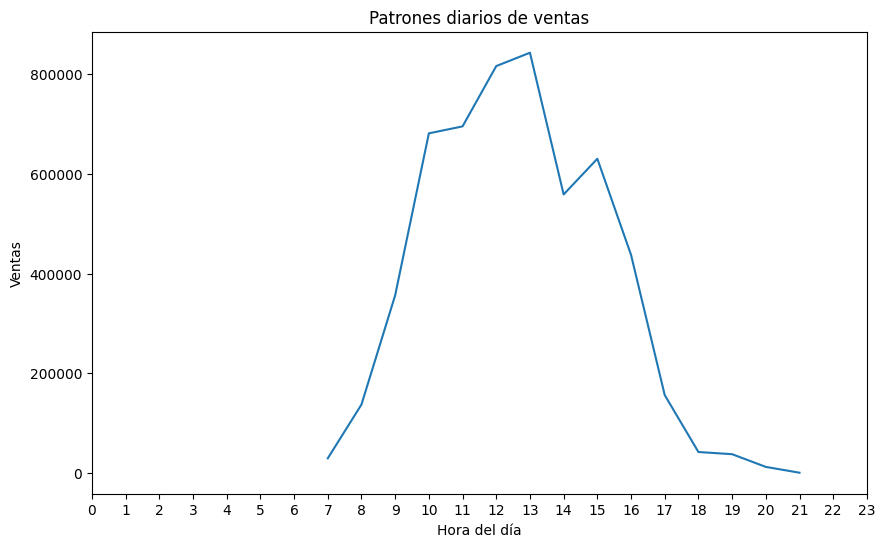

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(ventas_por_hora["Hour"], ventas_por_hora["Quantity"])
plt.xlabel("Hora del día")
plt.ylabel("Ventas")
plt.title("Patrones diarios de ventas")
plt.xticks(range(24))
plt.show()

###### Patrones de demanda por dia de semana

## 4 - Análisis de correlación para determinar la relación entre las variables, por ejemplo, si existe una correlación entre el precio y la cantidad de ventas

Usamos las columnas:
- Price
- Quantity

In [32]:
cols = ["Price", "Quantity"]
interes = datos[cols]

In [33]:
correlacion = interes.corr()

In [34]:
print(correlacion)

             Price  Quantity
Price     1.000000 -0.001931
Quantity -0.001931  1.000000


Usamos seanborn ya que este nos provee de mapas de calor para poder visualizar mas adecuadamente la correlacion

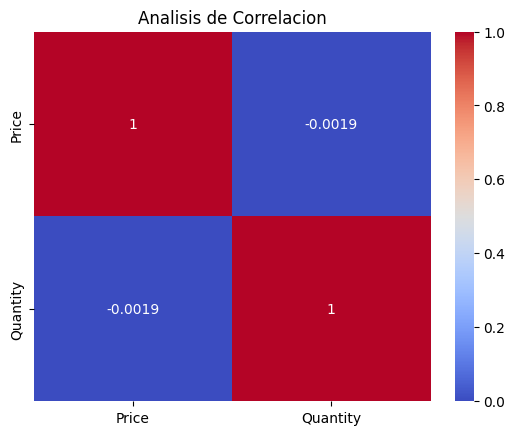

No hay correlacion entre el precio y la cantidad de ventas de productos


In [35]:
sns.heatmap(correlacion, annot=True, cmap="coolwarm")
plt.title("Analisis de Correlacion")
plt.show()
print("No hay correlacion entre el precio y la cantidad de ventas de productos")